<h1 align="center"> Predicting Housing Prices Assignment </h1>
<h2 align="center"> Michael Galarnyk </h2> <p></p>

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<h2 align="center">Loading Home Data csv file </h2> <p></p>

In [154]:
home_data = pd.read_csv('home_data.csv')
df = home_data[['price', 'zipcode']]

In [155]:
zip_AVG_price = pd.DataFrame(data = df.groupby('zipcode', as_index=False).mean())
zip_AVG_price.sort_values(['price'],ascending=False).head(1)

,zipcode,price
24,98039,2160606


<h2 align="center">(a) The price for zipcode: 98039 is 2,160,606  </h2> <p></p>

In [156]:
print 'original array size: ', len(home_data.index)

square_range_df = home_data[(home_data['sqft_living'] > 2000) & (home_data['sqft_living'] <= 4000)]
print 'new array size: ', len(square_range_df.index)
print 'Fraction of all houses from > 2000 to 4000 is: %.2f' % (len(square_range_df.index)/float(len(home_data.index)))

original array size:  21613
new array size:  9118
Fraction of all houses from > 2000 to 4000 is: 0.42


<h2 align="center">(b) The fraction of all houses with square footage in the range of (2000, 4000] is .42  </h2> <p></p>

In [180]:
%matplotlib inline 
from sklearn.linear_model import LinearRegression

advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','condition','grade','waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated','lat', 'long','sqft_living15','sqft_lot15']
train_data = home_data.iloc[0: int(8 * len(home_data)/10)]
test_data = home_data.iloc[int(8 * len(home_data)/10):]
X = train_data[advanced_features]
y = train_data['price']

lm = LinearRegression()
lm.fit(X, y)
lm.coef_
# print coefficients
features_coef = zip(advanced_features, lm.coef_)
len(train_data), len(test_data)

(17290, 4323)

<h2 align="center"> Simple Regression</h2> <p></p>

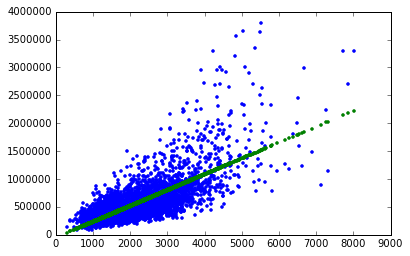

In [236]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

train_data = home_data.iloc[0: int(8 * len(home_data)/10)]
test_data = home_data.iloc[int(8 * len(home_data)/10):]
X = train_data['sqft_living']
y = train_data['price']

lm = LinearRegression()

X, y = X.reshape(17290,1), y.reshape(17290,1)
#print X.shape, y.shape
lm = LinearRegression()
lm.fit(X, y)
lm.coef_

test_data['sqft_living'].reshape(4323,1)
# print coefficients
plt.plot(test_data['sqft_living'],test_data['price'], '.') 

# need to reshape for test_data because the coef were found with reshape
plt.plot(test_data['sqft_living'],lm.predict(test_data['sqft_living'].reshape(4323,1)), '.') 

1